# **Introduction**

The first part of the notebook contains a quick introduction guide to the deep learning area. Experienced colleagues who know the basics can skip to the second part, where they will find the problems for the competition.

# **Part I: Tutorial**

The instructional part of the notebook wants to teach basic knowledge to absolute beginners. Although it is also worthwhile for advanced colleagues to check them out. There are tutorial videos in each chapter, so it’s a good idea to start with them, and then you can find the implementation part for that topic, where you only need to run the pre-written code.

## **Imports**

Firstly you need to import the necessary python modules
(just press the shift + enter to run the selected section)

In [ ]:
import tensorflow as tf

import csv
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML, Audio, Image, YouTubeVideo

## **utilities**

We have a couple of utilities for plotting the intermediate results and the data.
(just press the shift + enter to run the selected section)

In [ ]:
def plot_images(X, Y, class_names, fig_size=10, rows=3, cols=5):
  plt.figure(figsize=(fig_size, fig_size))
  for i in range(rows*cols):
      plt.subplot(rows, cols,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(X[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[int(Y[i])])
  plt.show()


def plot_image(i, predictions_array, true_label, img, class_names):
  true_label, img = int(true_label), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')


def visualization(x, y_true, y_pred, class_names):
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, y_pred[i], y_true[i], x, class_names)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, y_pred[i], y_true)
    plt.tight_layout()
    plt.show()
    

def create_submit_csv(name, y_pred):
    
    field_names = ['id', 'label'] 
    n = len(y_pred)
    y_pred_integer = y_pred.argmax(1)
    predictions = []
    for i in range(n):
        predictions.append({
            'id': i,
            'label': y_pred_integer[i]
    })
    with open(name + '.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames = field_names)
        writer.writeheader()
        writer.writerows(predictions)

# **Hello world!**

  Let’s look at the “hello world” example in the field of machine learning. More precisely in the field of deep learning!

  In this example, we will see a neural network that can recognize handwritten digits.

## Dataset

  Firstly let's see the dataset. The MNIST database of handwritten digits (more information about the dataset available from [this page](http://yann.lecun.com/exdb/mnist/)), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
 (just press the shift + enter to run the selected section)
 
 For beginners, one of the biggest advantages of using Keras is its [dataset module](https://www.tensorflow.org/api_docs/python/tf/keras/datasets). With this module we can easily access MNIST module then loading the MNIST dataset.

In [ ]:
# Pythonic way :)
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

dataset = tf.keras.datasets.mnist.load_data()

dataset_train = dataset[0]
dataset_test = dataset[1]

x_train = dataset_train[0]
y_train = dataset_train[1]

x_test = dataset_test[0]
y_test = dataset_test[1]


img_height, img_width = x_train.shape[1:] 
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

let’s look at a few examples from the dataset

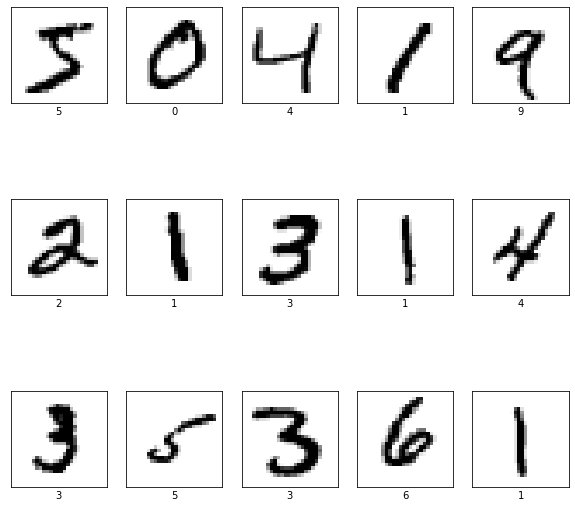

In [ ]:
plot_images(x_train, y_train, class_names)

# Linear model



Run the below section to import your first "mentor" video. 


Remark: The first part of the tutorial includes the [third season of the 3b1b](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) youtube channel, which introduces the topic of deep learning with the same MNIST classification problem. Moreover, the channel discusses many interesting mathematical and physical issues, so it is definitely worth to visit [Grant Sanderson's channel](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw).

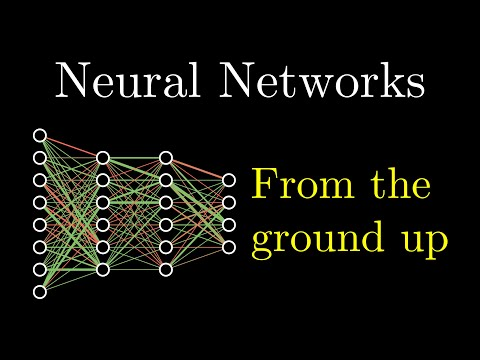

In [ ]:
# Youtube
id = 'aircAruvnKk'
YouTubeVideo(id=id, width=1.5*560, height=1.5*315)

Let's create a shallow neural network (by shallow I mean it is not a deep one due to it has only one hiden layer.)

Use the *Sequential()* constructor to create an empty network. You can then add a new layer to the network using the *add()* method.
  In the first layer, we just unroll the images (As you could see in the video) for further processes.
  You can then add the Dense Layer to the network in the second layer. The dense layer is an essential building block of the neural network. Without activation function The Dense layer contains perceptrons where each calculates the weighted average of its inputs. (With what weight? This is what the network learns during the training). The output of the Dense Layer is also a vector. The size of the output vector is given as a parameter, actualy this is the number of the perceptron in the layer, in our case, it is 16. The output vector can be the input of the next layer.    [For more details, check the official website :)](https://keras.io/api/layers/core_layers/dense/)
  In the final Dense layer, we set the output size to 10 because the network has to decide which class the input image belongs to (there are ten possible classes 0,1,2, ..., 9). Generally, during a classification task in the last layer, the activation function is Softmax which converts a vector of numbers into a vector of (pseudo)probabilities, one value for each class (the sum of the elements of that vector is 1).


(just press the shift + enter to run the selected section)

In [ ]:
basic_linear_model = tf.keras.Sequential()
basic_linear_model.add(tf.keras.layers.Flatten(input_shape=(img_height, img_width)))
basic_linear_model.add(tf.keras.layers.Dense(16, activation='relu'))
basic_linear_model.add(tf.keras.layers.Dense(10, activation='softmax'))




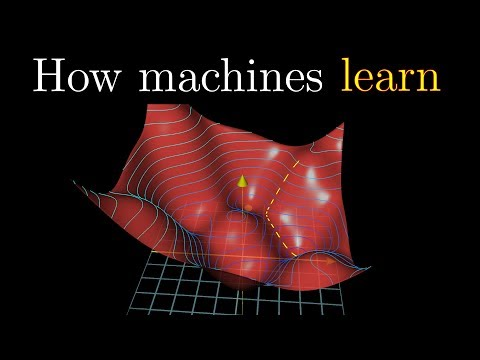

In [ ]:
# Youtube
id = 'IHZwWFHWa-w'
YouTubeVideo(id=id, width=1.5*560, height=1.5*315)

## Loss function

For the sake of optimizing the network, a loss function is mandatory.
Actually, a cost function just measure the "distance" between the predicted and the target outputs, so the loss function evaluates the actual network performance based on the network's response and the known correct answers for each input. The loss function type is a key hyper parameter of the network so it should be choosen wisely typically in a classification task, one usually use some kind of croosentropy loss function.


## Loss vs cost function

Loss and cost functions almost have the same meaning.
<ol>
<li>The loss function calculates the loss for one particular example.</li>
<li>The cost function calculates the average loss for the entire trainingset (so the cost function contains the loss function).</li>
</ol>

## Optimizer

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a chosen cost function.

## Model evaluation

Usually, the model is evaluated using a metric. The simplest metric is Accuracy. One can use it when all classes are equally important. the Accuracy is the percentage of the correct prediction of the network. You can read more details about the evaluation metrics from [this page](https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/)


(just press the shift + enter to run the selected section)

In [ ]:
basic_linear_model.compile(
                      optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy']
             )

A very optional video about the backpropagation but if you are beginer you should skip it.

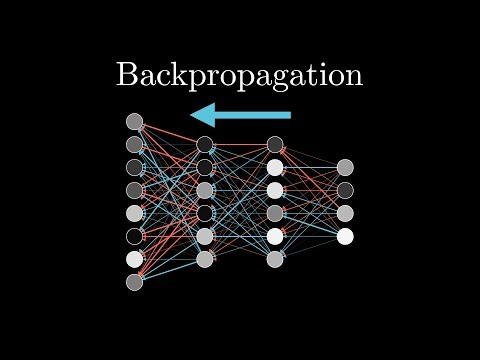

In [ ]:
# Youtube
id = 'Ilg3gGewQ5U'
YouTubeVideo(id=id, width=1.5*560, height=1.5*315)

For training the model just press the shift + enter to run the selected section

In [ ]:
# train the model
basic_linear_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 897us/step - loss: 4.7320 - accuracy: 0.2918
Epoch 2/5
1875/1875 [==============================] - 2s 981us/step - loss: 1.1943 - accuracy: 0.5616
Epoch 3/5
1875/1875 [==============================] - 2s 916us/step - loss: 0.9749 - accuracy: 0.6362
Epoch 4/5
1875/1875 [==============================] - 2s 963us/step - loss: 0.8156 - accuracy: 0.7089
Epoch 5/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.6435 - accuracy: 0.7917


Evaluate the trained model on the test set 

(just press the shift + enter to run the selected section)

313/313 [==============================] - 0s 628us/step - loss: 0.6157 - accuracy: 0.8085
the probability vector for the first image: [8.0991988e-08 8.2217900e-07 1.0763297e-02 5.6208763e-03 5.8801760e-07
 1.7144388e-05 2.0367697e-35 9.3036807e-01 7.4086706e-06 5.3221676e-02]
According to the network, the image is  7
And in fact, it is  7


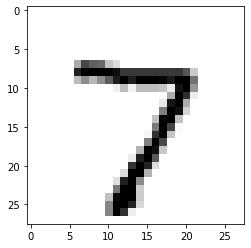

In [ ]:
basic_linear_model.evaluate(x_test,  y_test)
y_pred = basic_linear_model.predict(x_test)
# Let's see the result for first test sample
print("the probability vector for the first image:", y_pred[0])
print("According to the network, the image is ", np.argmax(y_pred[0]))
print("And in fact, it is ", y_test[0])
plt.imshow(x_test[0], cmap=plt.cm.binary)

[cite tensorflow tutorial](https://www.tensorflow.org/tutorials/keras/classification)
Further utilities

(just press the shift + enter to run the selected section)

In [ ]:
def plot_image(i, predictions_array, true_label, img, class_names):
  true_label, img = int(true_label), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[int(true_label)].set_color('blue')


def visualization(x, y_true, y_pred, class_names):
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, y_pred[i], y_true[i], x, class_names)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, y_pred[i], y_true)
    plt.tight_layout()
    plt.show()

For visualization of the results just press the shift + enter to run the selected section

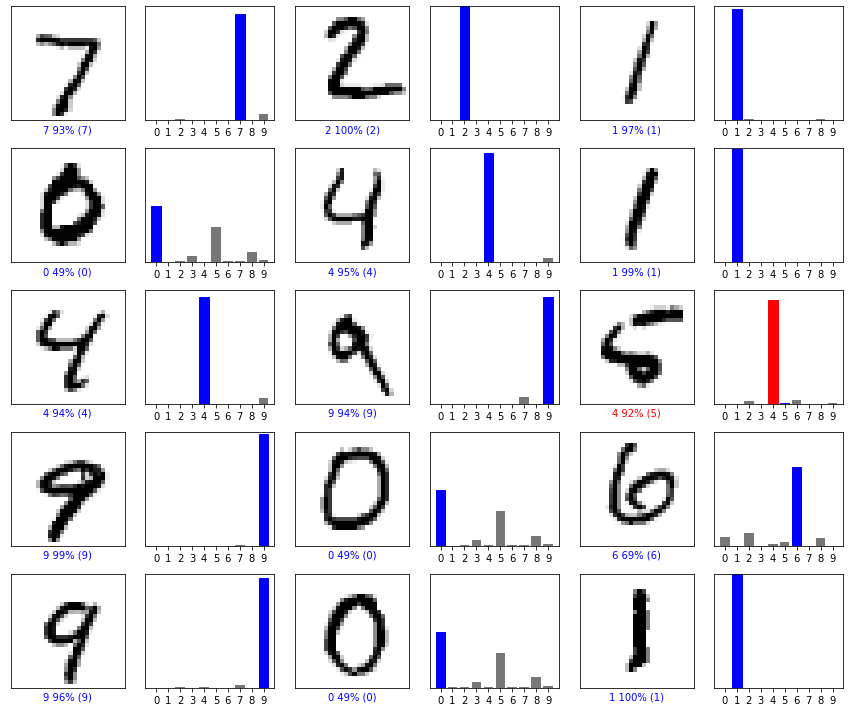

In [ ]:
visualization(x_test, y_test, y_pred, class_names)

Collecting everything into one place with some additional layers.

(Just press the shift + enter to run the selected section)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.9044 - accuracy: 0.7824
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2496 - accuracy: 0.9324
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1904 - accuracy: 0.9455
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1557 - accuracy: 0.9561
Epoch 5/5
313/313 [==============================] - 0s 905us/step - loss: 0.1457 - accuracy: 0.9610


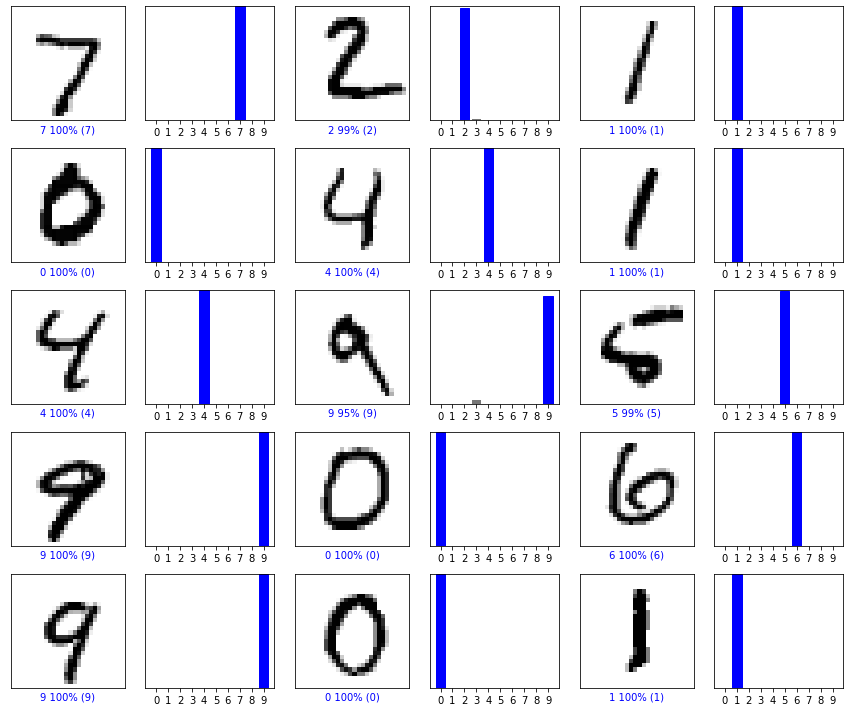

In [ ]:
# def model
improved_linear_model = tf.keras.Sequential()
improved_linear_model.add(tf.keras.layers.Flatten(input_shape=(img_height, img_width)))
improved_linear_model.add(tf.keras.layers.Dense(128, activation='relu'))
improved_linear_model.add(tf.keras.layers.Dense(64, activation='relu'))
improved_linear_model.add(tf.keras.layers.Dense(63, activation='relu'))
improved_linear_model.add(tf.keras.layers.Dense(10, activation='softmax'))

# def cost function and optimizer
improved_linear_model.compile(
                      optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy']
             )
# train model
improved_linear_model.fit(x_train, y_train, epochs=5)

#evaluate model
improved_linear_model.evaluate(x_test,  y_test)
y_pred = improved_linear_model.predict(x_test)

#visualize
visualization(x_test, y_test, y_pred, class_names)

# **A more complicated dataset**

Let's check what is the performance of the chosen architecture on a more complex dataset (which contains also 10 classes)

(50000, 1)
6


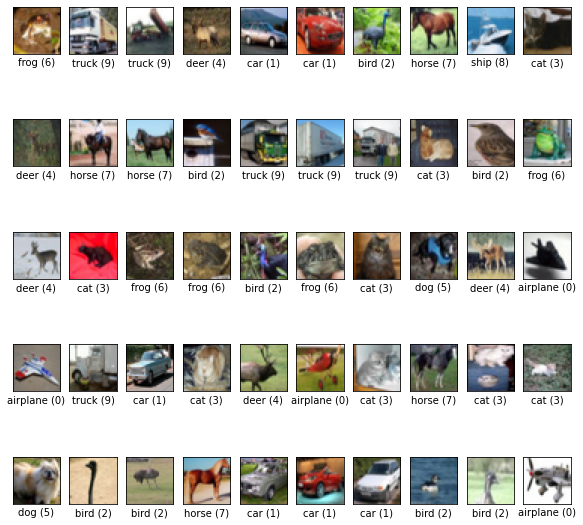

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
img_height, img_width, number_of_channels = x_train.shape[1:] 
class_names = ['airplane (0)', 'car (1)', 'bird (2)', 'cat (3)', 'deer (4)', 'dog (5)', 'frog (6)', 'horse (7)', 'ship (8)', 'truck (9)']
print(y_train.shape)
print(int(y_train[0]))
plot_images(x_train, y_train, class_names, 10, 5, 10)

To check the performace of the previous network just press the shift + enter to run the selected section

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 17.8150 - accuracy: 0.1768
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.1309 - accuracy: 0.2700
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.1051 - accuracy: 0.2591
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0444 - accuracy: 0.2650
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.9761 - accuracy: 0.2447


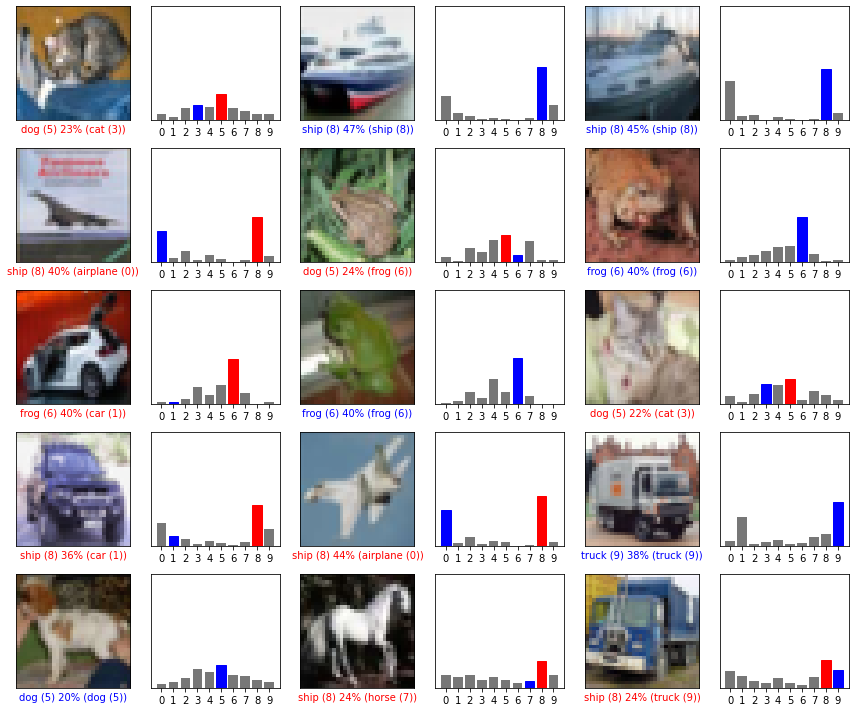

In [ ]:
# def model
improved_linear_model = tf.keras.Sequential()
improved_linear_model.add(tf.keras.layers.Flatten(input_shape=(img_height, img_width, number_of_channels)))
improved_linear_model.add(tf.keras.layers.Dense(128, activation='relu'))
improved_linear_model.add(tf.keras.layers.Dense(64, activation='relu'))
improved_linear_model.add(tf.keras.layers.Dense(63, activation='relu'))
improved_linear_model.add(tf.keras.layers.Dense(10, activation='softmax'))

# def cost function and optimizer
improved_linear_model.compile(
                      optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy']
             )
# train model
improved_linear_model.fit(x_train, y_train, epochs=5)

#evaluate model
improved_linear_model.evaluate(x_test,  y_test)
y_pred = improved_linear_model.predict(x_test)

#visualize
visualization(x_test, y_test, y_pred, class_names)

As you could see the accuracy decreased a lot. This is not a big surprise, since for this dataset we made a lot of bad choices:

<ol>
<li>Dense layer was used for an image classification task although in this case usually convolutional layers are used.</li>
<li>We haven't applied any kind of normalization yet.</li>
<li>We haven't done any regularization yet.</li>    
</ol>

Check the following video about the Bach normalization :(just press the shift + enter)
or watch it via this [link](https://www.youtube.com/watch?v=DtEq44FTPM4)

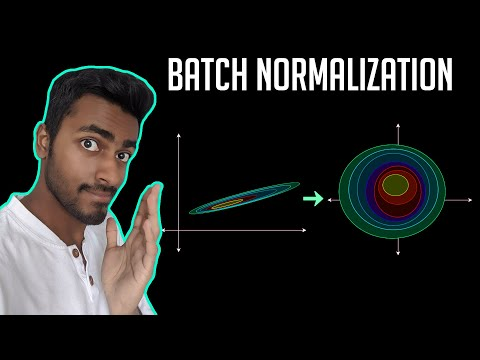

In [ ]:
# Youtube
id = 'DtEq44FTPM4'
YouTubeVideo(id=id, width=1.5*560, height=1.5*315)

Check the following video about the Convolutional Neural Networks :(just press the shift + enter)
or watch it via this [link](https://www.youtube.com/watch?v=pj9-rr1wDhM)

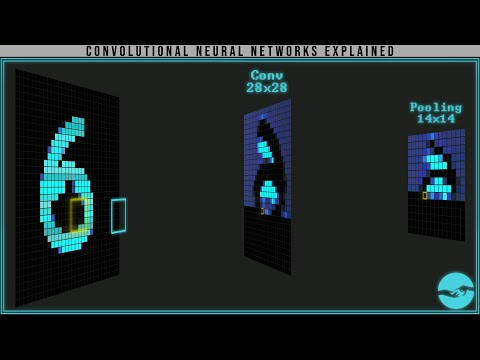

In [ ]:
# Youtube
id = 'pj9-rr1wDhM'
YouTubeVideo(id=id, width=1.5*560, height=1.5*315)

To check the updated architecture just press the shift + enter to run the selected section

In [ ]:
# def model
filters = 128
model_cv = tf.keras.Sequential()
model_cv.add(tf.keras.Input(shape=(32, 32, 3)))
model_cv.add(tf.keras.layers.Convolution2D(filters, kernel_size=(3, 3), padding='same',  activation='relu'))
model_cv.add(tf.keras.layers.BatchNormalization())

model_cv.add(tf.keras.layers.Convolution2D(filters/2, kernel_size=(3, 3), padding='same',  activation='relu'))
model_cv.add(tf.keras.layers.BatchNormalization())
model_cv.add(tf.keras.layers.Dropout(0.1))

model_cv.add(tf.keras.layers.Flatten())
model_cv.add(tf.keras.layers.Dense(10, activation='softmax'))

# def cost function and optimizer
model_cv.compile(
                      optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy']
             )
# train model
model_cv.fit(x_train, y_train, epochs=1)

#evaluate model
model_cv.evaluate(x_test,  y_test)
y_pred = model_cv.predict(x_test)

#visualize
visualization(x_test, y_test, y_pred, class_names)




313/313 [==============================] - 18s 57ms/step - loss: 1.6531 - accuracy: 0.4923


# Part II: Competition

The competition part will be similar to the previous practice part of the tutorial. The participating colleague must perform image classification, but not in the CIFAR10 but in the CIFAR 100 data set, which means that there are 100 classes instead of 10 classes.

<mark>The competition lasts until the 21st of July, at 12PM.</mark>

The result to be submitted will be a CSV file that contains the prediction of your model. For the proper saving and the evaluation, we have already implemented the CSV creating method, you should just invoke it with the proper parameters (the first parameter must be the name of the CVS file (it will be the one unique ID of your submission) and the second parameter must be the y_pred. y_pred should be a One Hot Encoded Matrix and not an Integer encoded vector).
</ol>
<li>Integer Encoding: Where each unique label is mapped to an integer.</li>
<li>One Hot Encoding: Where each label is mapped to a binary vector.</li>
</ol>
After creating your CSV file, you can find and download it to your computer (File -> Open, select the created CSV file and press the download button) and from your computer upload your solution (the CSV file) via the following

[link](https://aichallange.azurewebsites.net/api/AIChallange?code=yF2tcTl5YXatkOwR2VdDq/MzYfwuVzkX7keV32tAsQcWKFR8rZ40Jg==)

## Rookie/newcomer category (Challenge 1):

### Eligibility:

Only absolute beginner colleagues who have never implemented any neural network can participate in the beginner category.

### Not allowed
<ol>
<li>transfer learning.</li>
<li>use of an additional data set</li>
<li>using the test part of the dataset for training...</li>
<li>data augmentation</li>
</ol>

### Allowed
<ol>
<li>The model learned during the tutorial can also be used, but it will be not enough to achieve a good position in the competition, so it worth starting with the presented models, but you should develop it in some way.</li>
<li>Any type of optimizer can be used (SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl )</li>
<li>You can set the number of epochs so you can train your network as long as you wish during the competition (maximum one week)</li>
</ol>


## Advanced category (Challenge 2):

### Eligibility:

For beginner and advanced colleagues. 

<ol>
<li>They have already completed a couple of online courses and tutorials.</li>
<li>They have already implemented a few simple neural networks</li>
</ol>

### Not allowed
<ol>
<li>use of an additional data set</li>
<li>using the test part of the dataset for training...</li>

</ol>

### Allowed
<ol>
<li>Transfer learning BUT the classifier part of the network mustn't be reused!</li>
<li>data augmentation</li>
<li>The model learned during the tutorial can also be used, but it will be not enough to achieve a good position in the competition, so it worth starting with the presented models, but you should develop it in some way.</li>
<li>Any type of optimizer can be used (SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam, Ftrl )</li>
<li>You can set the number of epochs so you can train your network as long as you wish during the competition (maximum one week)</li>
</ol>


## Submission

The first three positions of the competition are determined by the prediction accuracy of the model on the test set. You can monitor your position via the [leader board](https://aichallengedashboard.azurewebsites.net/api/AIChallangeDashboard?code=MNhI7RDYI6epEG5KRyxjcnGm1jTIaJYJcPPqBWnadrh4QlOhq3fFYg==) of the competition. During the competition you can continuously submit new models. But please note that only your last three models will be evaluated at the end of the competition. Although the leaderboard shows the best submissions from all submissions.

During the competition, the test set will be split into two parts (into a public and a private parts. The participants can see their place in the leaderboard but during the competition their score will be evaluated only on the public part of the test set. At the end of the competition the actual final score (public and private score as well) will be available. So the first place of the public leaderboard perhaps just the third place in private board. Additionally, <Mark>the leaderboard shows the best score of every participant from all submissions BUT the participants should be aware that only their last three submissions will be evaluated at the end of the competition!</Mark>

Let us emphasize again that, during the competition your position will be evaluated on the public part of the test set and after the end of the competition the participants can see their real place based on the full test set. <mark>Your last three submissions will be evaluated!</mark> And not your best three submissions, so on the last day of the competition may be a good idea to resubmit your three best results. <mark>The jury will also ask for the source code of the solution of the top three places, so it worth tracking the implementation of the given submission in some way.</mark>

You can upload your result (the generated CSV file) via this [page](https://aichallange.azurewebsites.net/api/AIChallange?code=yF2tcTl5YXatkOwR2VdDq/MzYfwuVzkX7keV32tAsQcWKFR8rZ40Jg==). <mark>After every submission, you will receive an email regarding the public score and what is your last three submissions.  So if your last submission doesn't contain your best submission then it worth submitting the best one again.<mark>
    
Please use the same username every time for easier tracking :)
    
<Mark>Be aware that, The competition lasts until the 21st of July, at 12PM. </Mark> 

# Questions and answers

### I have the best private score... why I haven't got the first place?

Your best submission wasn't in your last three so it wasn't evaluated at the end of the competition.
If you could turn back the time, then you should resubmit your best solution (after a submission a notification email will be sent to the participant where the participant can see the last three submissions).

### We (Challenge 1-2) also have the entire test set so we can also calculate the private score...Why we have that public and private score?

You are right. You already know what is your best solution (when you call the model_cv.evaluate(x_test,  y_test) function it prints the accuracy) but you won't know what is the other participants' private score.

PS: If you know what your best solution is, please resubmit if it has not been included in your last three submissions to avoid future conflicts.

### I can't decide which category to start in. What should I do?

just contact someone on the jury.
* Medvedev Mihaly (XC-AD/EPE-Bp)
* Szilagyi Marton (XC-AD/ENG1-Bp)
* Schultz Benedek (XC-AD/ENG1-Bp)
* Feher Gergo (XC-AD/EPE-Bp)

### If I am a beginer can I win all categories?

Theoretically yes, but you will get only one reward in that case as well

# Example for submissions

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
img_height, img_width, number_of_channels = x_train.shape[1:] 
class_names = ['airplane (0)', 'car (1)', 'bird (2)', 'cat (3)', 'deer (4)', 'dog (5)', 'frog (6)', 'horse (7)', 'ship (8)', 'truck (9)']

class_names = np.empty(dtype=int, shape=100 )
for i in range(100):
    class_names[i] = f"{i}"

plot_images(x_train, y_train, class_names, 10, 5, 10)

In [ ]:
# sub1 -> "model_test1"
# def model
filters = 128
model_cv = tf.keras.Sequential()
model_cv.add(tf.keras.Input(shape=(32, 32, 3)))
model_cv.add(tf.keras.layers.Convolution2D(filters, kernel_size=(3, 3), padding='same',  activation='relu'))
model_cv.add(tf.keras.layers.BatchNormalization())

model_cv.add(tf.keras.layers.Convolution2D(filters/2, kernel_size=(3, 3), padding='same',  activation='relu'))
model_cv.add(tf.keras.layers.BatchNormalization())
model_cv.add(tf.keras.layers.Dropout(0.1))

model_cv.add(tf.keras.layers.Flatten())
model_cv.add(tf.keras.layers.Dense(100, activation='softmax'))

# def cost function and optimizer
model_cv.compile(
                      optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy']
             )
# train model
model_cv.fit(x_train, y_train, epochs=2)

#evaluate model
model_cv.evaluate(x_test,  y_test)
y_pred = model_cv.predict(x_test)

In [ ]:
create_submit_csv("model_test1", y_pred)

In [ ]:
# sub2 -> "model_test2"
# def model 
filters = 128
model_cv = tf.keras.Sequential()
model_cv.add(tf.keras.Input(shape=(32, 32, 3)))
model_cv.add(tf.keras.layers.Convolution2D(filters, kernel_size=(3, 3), padding='same',  activation='relu'))
model_cv.add(tf.keras.layers.BatchNormalization())

model_cv.add(tf.keras.layers.Convolution2D(filters/2, kernel_size=(3, 3), padding='same',  activation='relu'))
model_cv.add(tf.keras.layers.BatchNormalization())
model_cv.add(tf.keras.layers.Dropout(0.1))

model_cv.add(tf.keras.layers.Flatten())
model_cv.add(tf.keras.layers.Dense(100, activation='softmax'))

# def cost function and optimizer
model_cv.compile(
                      optimizer='adam',
                      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy']
             )
# train model
model_cv.fit(x_train, y_train, epochs=2)

#evaluate model
model_cv.evaluate(x_test,  y_test)
y_pred = model_cv.predict(x_test)

In [ ]:
create_submit_csv("model_test2", y_pred)